In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Load the FTIR spectra data from the uploaded CSV file
info_A1 = r"C:\Users\pingk\Downloads\fadhli nitip\asik.csv"
ftir_data = pd.read_csv(info_A1)

In [3]:
# Display the first few rows of the dataset to understand its structure
print(ftir_data.head())

  prov_char country_char               wavenumber   649.893   650.376  \
0       BBX           ID  ID-BBX-068-2307-031_001  0.016094  0.016946   
1       BBX           ID  ID-BBX-068-2307-031_002  0.013664  0.013097   
2       BBX           ID  ID-BBX-068-2307-031_003  0.015954  0.016134   
3       BBX           ID  ID-BBX-068-2307-031_004  0.013254  0.012653   
4       BBX           ID  ID-BBX-068-2307-031_005  0.014003  0.013402   

    650.858    651.34   651.822   652.304   652.786  ...  3998.194  3998.676  \
0  0.017469  0.017538  0.017089  0.016154  0.014849  ...  0.000862  0.000858   
1  0.012600  0.012208  0.011938  0.011801  0.011799  ...  0.001151  0.001114   
2  0.015986  0.015469  0.014614  0.013532  0.012372  ...  0.000658  0.000470   
3  0.011752  0.010722  0.009749  0.008982  0.008484  ...  0.002017  0.001975   
4  0.012824  0.012274  0.011728  0.011171  0.010621  ...  0.002369  0.002324   

   3999.158   3999.64  4000.122  tgp_name  dgp_name  fgp_name  country_name  \
0

The dataset contains FTIR spectra data with columns representing different wavenumbers and their corresponding absorption values. The relevant features for the requested visualization include country_name for coloring the spectra. The wavenumber columns range from 649.893 to 4000.122 cm⁻¹.

Let's create a visualization where the x-axis is reversed (4000 to 650 cm⁻¹), and the spectra are colored based on the country_name feature. We will also include a legend indicating the color associated with each country.

To achieve this, we'll plot the spectra using Matplotlib and adjust the x-axis accordingly.

In [4]:
unique_countries = ftir_data['country_name'].unique()
print(unique_countries)


['Indonesia' 'Malaysia' 'Thailand']


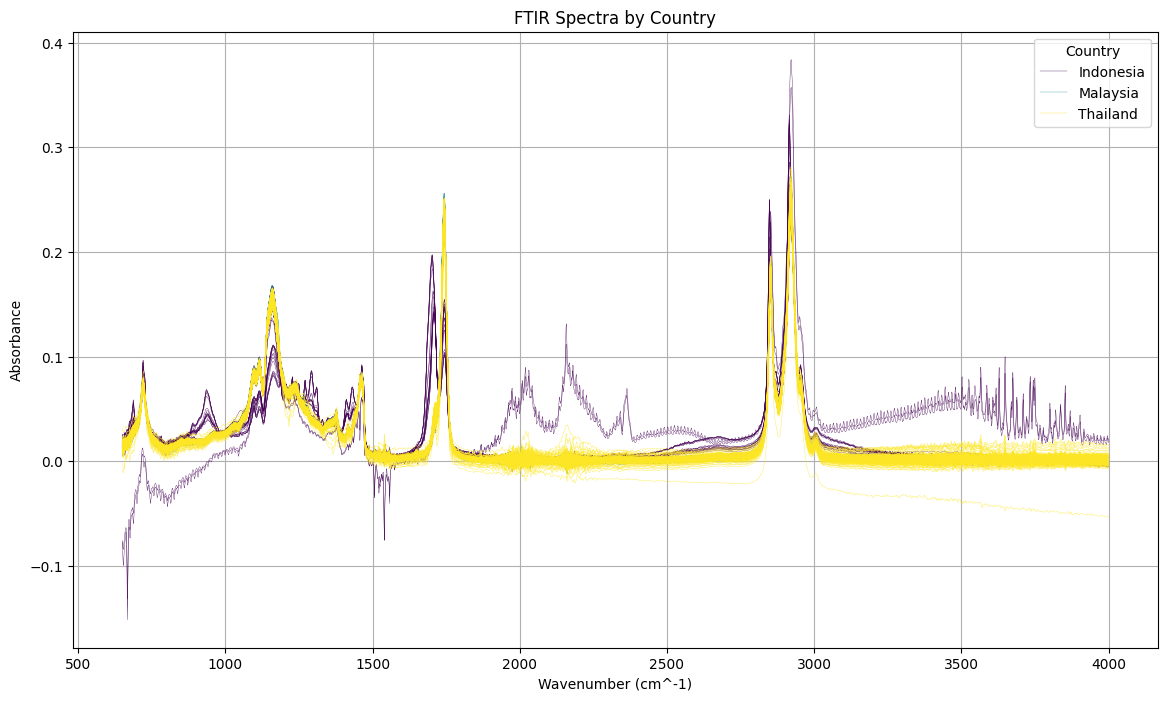

In [5]:
#assert len(unique_countries) == 3, "There should be exactly three unique countries"

# Create a viridis color palette
viridis = plt.get_cmap('viridis', len(unique_countries))
country_colors = {country: viridis(i) for i, country in enumerate(unique_countries)}

# Extract wavenumbers and reverse them
wavenumbers = ftir_data.columns[3:-5].astype(float)[::-1]

# Plotting
plt.figure(figsize=(14, 8))

for country in unique_countries:
    subset = ftir_data[ftir_data['country_name'] == country]
    first_plot = True
    for i, row in subset.iterrows():
        if first_plot:
            plt.plot(wavenumbers, row.iloc[3:-5].values[::-1], label=country, color=country_colors[country], linewidth=0.25)
            first_plot = False
        else:
            plt.plot(wavenumbers, row.iloc[3:-5].values[::-1], color=country_colors[country], linewidth=0.25)

# Customizing the plot
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Absorbance')
plt.title('FTIR Spectra by Country')
plt.legend(title='Country')
plt.grid(True)  # Enable the grid

# Showing the plot
plt.show()

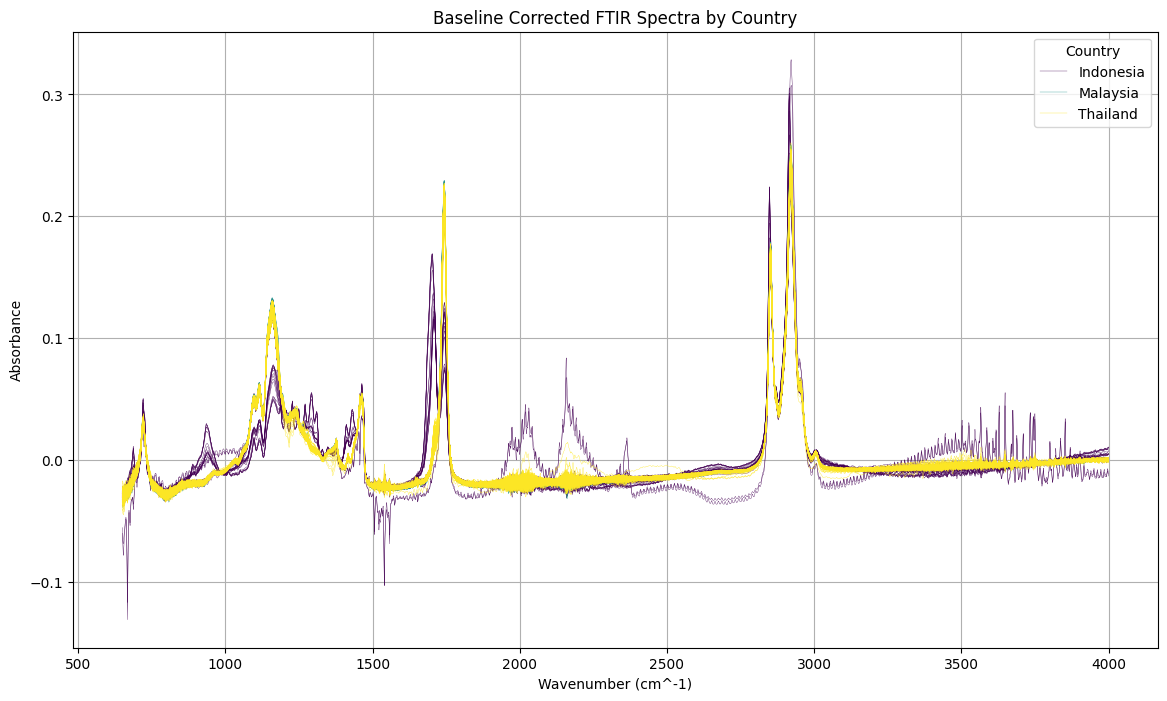

In [6]:

# Check unique countries
unique_countries = ftir_data['country_name'].unique()

# Create a viridis color palette
viridis = plt.get_cmap('viridis', len(unique_countries))
country_colors = {country: viridis(i) for i, country in enumerate(unique_countries)}

# Extract wavenumbers and reverse them
wavenumbers = ftir_data.columns[3:-5].astype(float)[::-1]

# Function to perform baseline correction
def baseline_correction(spectrum, poly_order=3):
    spectrum = spectrum.astype(float)  # Ensure the spectrum is float
    x = np.arange(len(spectrum))
    p = np.polyfit(x, spectrum, poly_order)
    baseline = np.polyval(p, x)
    return spectrum - baseline

# Plotting
plt.figure(figsize=(14, 8))

for country in unique_countries:
    subset = ftir_data[ftir_data['country_name'] == country]
    first_plot = True
    for i, row in subset.iterrows():
        spectrum = row.iloc[3:-5].values[::-1]
        corrected_spectrum = baseline_correction(spectrum)
        if first_plot:
            plt.plot(wavenumbers, corrected_spectrum, label=country, color=country_colors[country], linewidth=0.25)
            first_plot = False
        else:
            plt.plot(wavenumbers, corrected_spectrum, color=country_colors[country], linewidth=0.25)

# Customizing the plot
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Absorbance')
plt.title('Baseline Corrected FTIR Spectra by Country')
plt.legend(title='Country')
plt.grid(True)  # Enable the grid

# Showing the plot
plt.show()

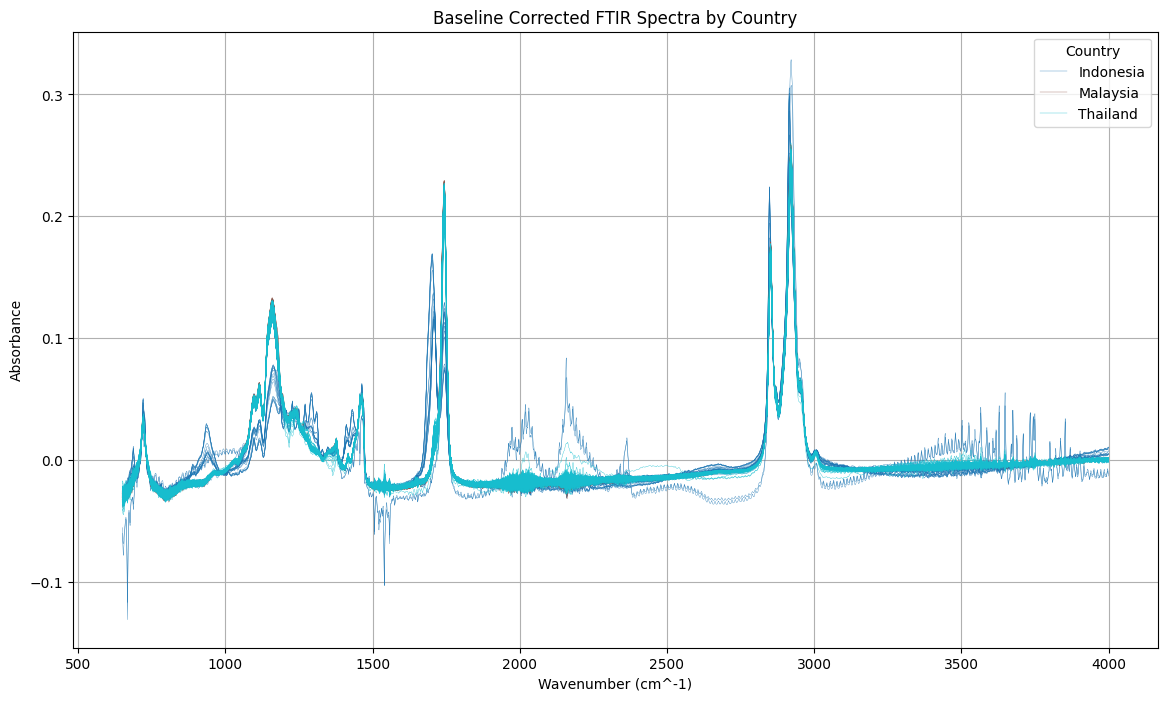

In [7]:
# Check unique countries
unique_countries = ftir_data['country_name'].unique()

# Create a tab10 color palette
tab10 = plt.get_cmap('tab10', len(unique_countries))
country_colors = {country: tab10(i) for i, country in enumerate(unique_countries)}

# Extract wavenumbers and reverse them
wavenumbers = ftir_data.columns[3:-5].astype(float)[::-1]

# Function to perform baseline correction
def baseline_correction(spectrum, poly_order=3):
    spectrum = spectrum.astype(float)  # Ensure the spectrum is float
    x = np.arange(len(spectrum))
    p = np.polyfit(x, spectrum, poly_order)
    baseline = np.polyval(p, x)
    return spectrum - baseline

# Plotting
plt.figure(figsize=(14, 8))

for country in unique_countries:
    subset = ftir_data[ftir_data['country_name'] == country]
    first_plot = True
    for i, row in subset.iterrows():
        spectrum = row.iloc[3:-5].values[::-1]
        corrected_spectrum = baseline_correction(spectrum)
        if first_plot:
            plt.plot(wavenumbers, corrected_spectrum, label=country, color=country_colors[country], linewidth=0.25)
            first_plot = False
        else:
            plt.plot(wavenumbers, corrected_spectrum, color=country_colors[country], linewidth=0.25)

# Customizing the plot
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Absorbance')
plt.title('Baseline Corrected FTIR Spectra by Country')
plt.legend(title='Country')
plt.grid(True)  # Enable the grid

# Showing the plot
plt.show()

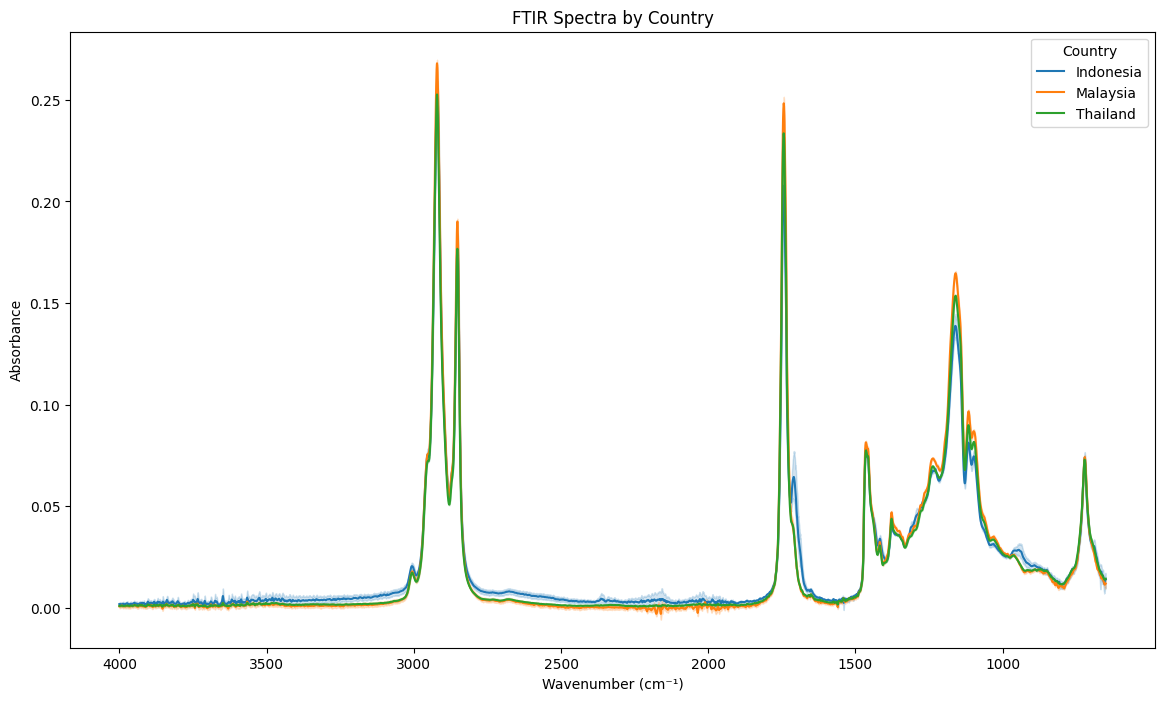

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Data Visualization (Spectroscopy Data by Country Code)
spectroscopy_columns = ftir_data.columns.difference(['country_code', 'prov_char', 'country_char', 'wavenumber', 'tgp_name', 'dgp_name', 'fgp_name', 'thnoth_name'])
melted_ftir_data = ftir_data.melt(id_vars='country_name', value_vars=spectroscopy_columns, var_name='Wavenumber', value_name='Intensity')

# Convert Wavenumber to numeric if it's not already
melted_ftir_data['Wavenumber'] = pd.to_numeric(melted_ftir_data['Wavenumber'])

plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_ftir_data, x='Wavenumber', y='Intensity', hue='country_name', palette='tab10')
plt.title('FTIR Spectra by Country')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.legend(title='Country')

# Improve x-axis readability by setting ticks every 500 cm⁻¹ and reversing the axis
plt.xticks(np.arange(4000, 649, -500))  # Ticks from 4000 to 650 cm⁻¹
plt.gca().invert_xaxis()  # Reverse the x-axis
plt.grid(False)  # Enable grid

plt.show()

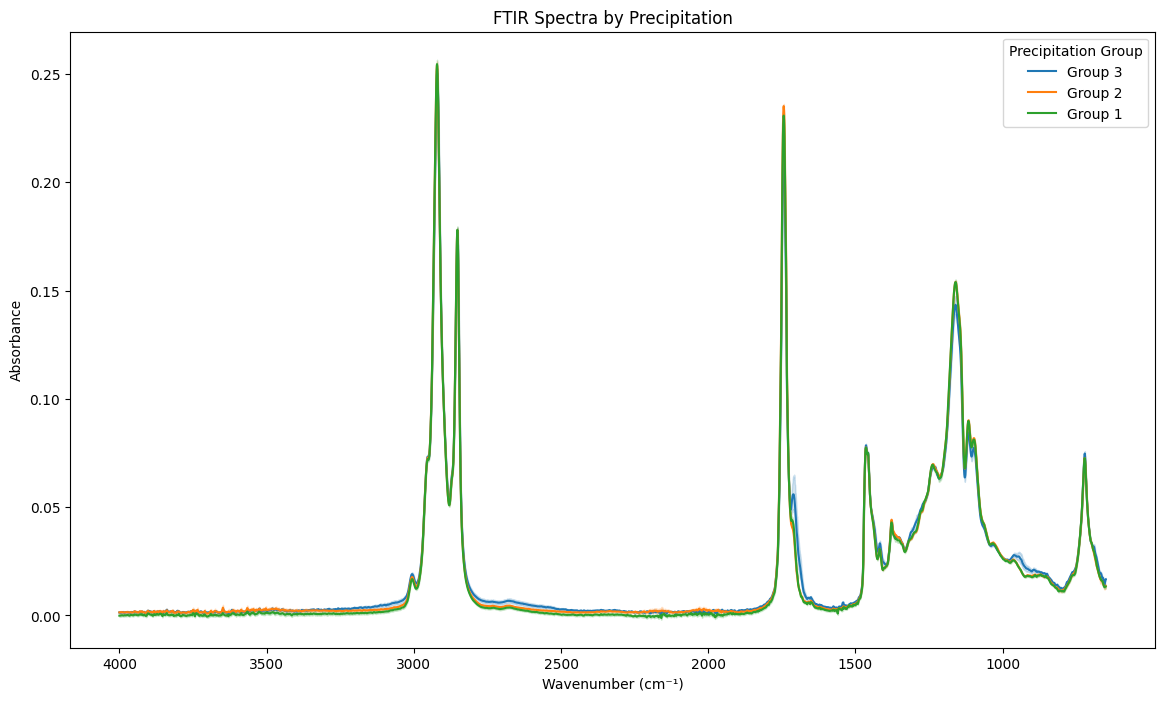

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Data Visualization (Spectroscopy Data by Country Code)
spectroscopy_columns = ftir_data.columns.difference(['country_code', 'prov_char', 'country_char', 'wavenumber', 'country_name', 'dgp_name', 'fgp_name', 'thnoth_name'])
melted_ftir_data = ftir_data.melt(id_vars='tgp_name', value_vars=spectroscopy_columns, var_name='Wavenumber', value_name='Intensity')

# Convert Wavenumber to numeric if it's not already
melted_ftir_data['Wavenumber'] = pd.to_numeric(melted_ftir_data['Wavenumber'])

plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_ftir_data, x='Wavenumber', y='Intensity', hue='tgp_name', palette='tab10')
plt.title('FTIR Spectra by Precipitation')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.legend(title='Precipitation Group')

# Improve x-axis readability by setting ticks every 500 cm⁻¹ and reversing the axis
plt.xticks(np.arange(4000, 649, -500))  # Ticks from 4000 to 650 cm⁻¹
plt.gca().invert_xaxis()  # Reverse the x-axis
plt.grid(False)  # Enable grid

plt.show()

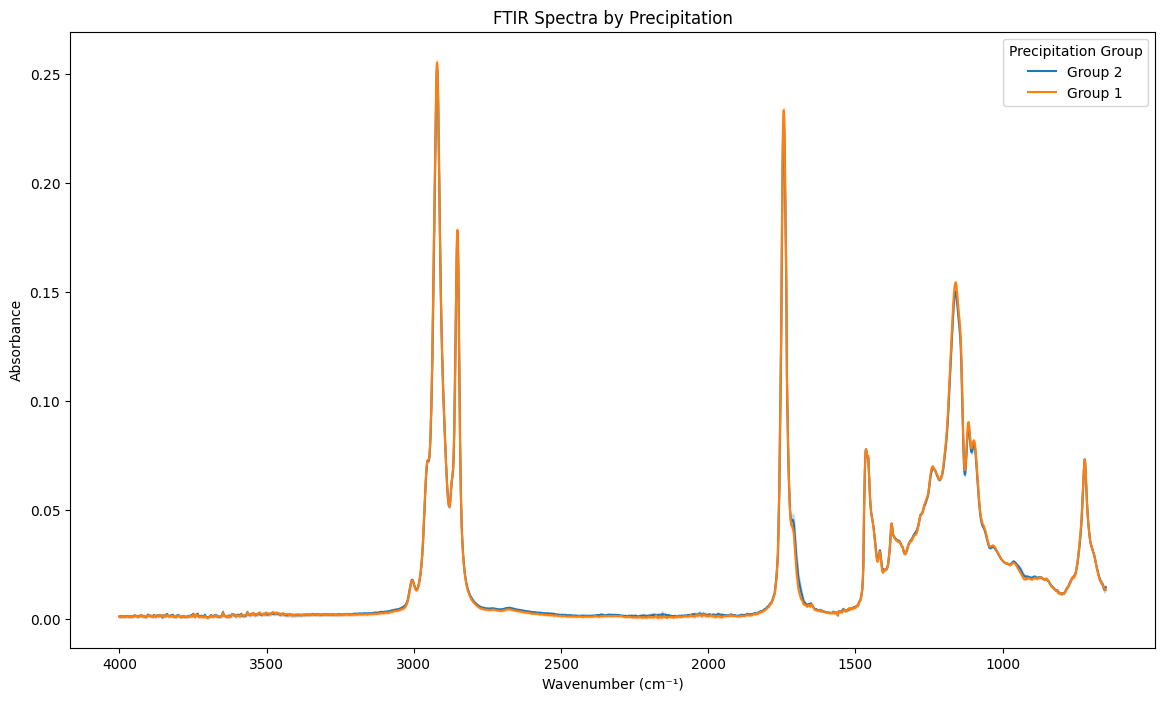

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Data Visualization (Spectroscopy Data by Country Code)
spectroscopy_columns = ftir_data.columns.difference(['country_code', 'prov_char', 'country_char', 'wavenumber', 'country_name', 'tgp_name', 'fgp_name', 'thnoth_name'])
melted_ftir_data = ftir_data.melt(id_vars='dgp_name', value_vars=spectroscopy_columns, var_name='Wavenumber', value_name='Intensity')

# Convert Wavenumber to numeric if it's not already
melted_ftir_data['Wavenumber'] = pd.to_numeric(melted_ftir_data['Wavenumber'])

plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_ftir_data, x='Wavenumber', y='Intensity', hue='dgp_name', palette='tab10')
plt.title('FTIR Spectra by Precipitation')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.legend(title='Precipitation Group')

# Improve x-axis readability by setting ticks every 500 cm⁻¹ and reversing the axis
plt.xticks(np.arange(4000, 649, -500))  # Ticks from 4000 to 650 cm⁻¹
plt.gca().invert_xaxis()  # Reverse the x-axis
plt.grid(False)  # Enable grid

plt.show()

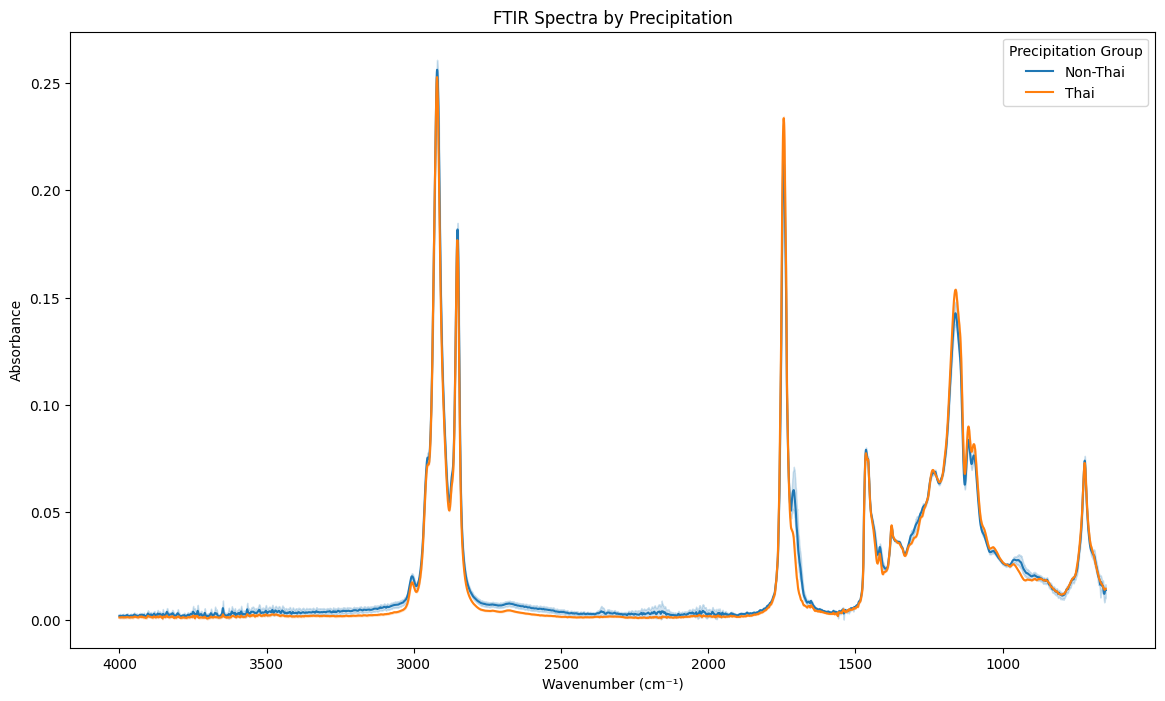

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Data Visualization (Spectroscopy Data by Country Code)
spectroscopy_columns = ftir_data.columns.difference(['country_code', 'prov_char', 'country_char', 'wavenumber', 'country_name', 'tgp_name', 'fgp_name', 'dgp_name'])
melted_ftir_data = ftir_data.melt(id_vars='thnoth_name', value_vars=spectroscopy_columns, var_name='Wavenumber', value_name='Intensity')

# Convert Wavenumber to numeric if it's not already
melted_ftir_data['Wavenumber'] = pd.to_numeric(melted_ftir_data['Wavenumber'])

plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_ftir_data, x='Wavenumber', y='Intensity', hue='thnoth_name', palette='tab10')
plt.title('FTIR Spectra by Precipitation')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.legend(title='Precipitation Group')

# Improve x-axis readability by setting ticks every 500 cm⁻¹ and reversing the axis
plt.xticks(np.arange(4000, 649, -500))  # Ticks from 4000 to 650 cm⁻¹
plt.gca().invert_xaxis()  # Reverse the x-axis
plt.grid(False)  # Enable grid

plt.show()

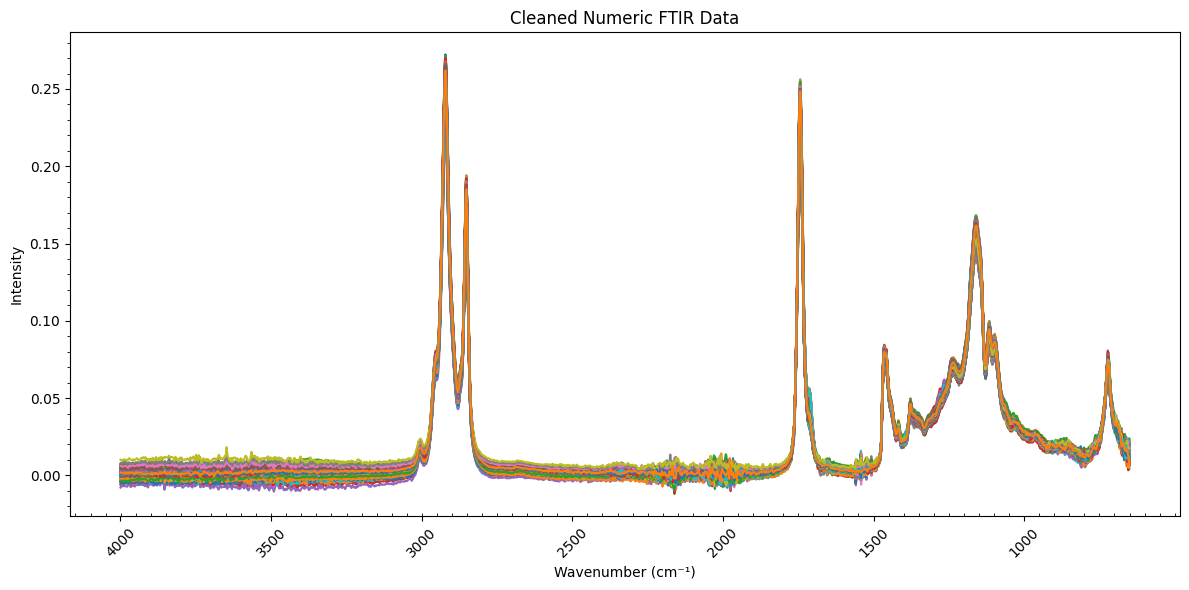

  prov_char country_char               wavenumber tgp_name dgp_name fgp_name  \
0       BBX           ID  ID-BBX-068-2307-031_001  Group 3  Group 2  Group 3   
1       BBX           ID  ID-BBX-068-2307-031_002  Group 3  Group 2  Group 3   
2       BBX           ID  ID-BBX-068-2307-031_003  Group 3  Group 2  Group 3   
3       BBX           ID  ID-BBX-068-2307-031_004  Group 3  Group 2  Group 3   
4       BBX           ID  ID-BBX-068-2307-031_005  Group 3  Group 2  Group 3   

  country_name thnoth_name  
0    Indonesia    Non-Thai  
1    Indonesia    Non-Thai  
2    Indonesia    Non-Thai  
3    Indonesia    Non-Thai  
4    Indonesia    Non-Thai  


In [38]:
from matplotlib.ticker import AutoMinorLocator

# Identify numeric and string columns
numeric_cols = ftir_data.select_dtypes(include=[np.number]).columns.tolist()
string_cols = ftir_data.select_dtypes(exclude=[np.number]).columns.tolist()

# Define criteria for bad spectra
def is_bad_spectrum(row):
    # Example criteria: any NaN values or all zero values
    if row.isnull().any() or (row == 0).all():
        return True
    return False

# Identify rows with bad spectra
bad_spectra_indices = ftir_data[numeric_cols].apply(is_bad_spectrum, axis=1)

# Calculate mean and standard deviation of spectra
mean_spectra = ftir_data[numeric_cols].mean()
std_spectra = ftir_data[numeric_cols].std()

# Define threshold for identifying outliers
threshold = 3  # This can be adjusted

# Identify outliers
outliers = ftir_data[numeric_cols].apply(lambda x: np.abs(x - mean_spectra) > threshold * std_spectra, axis=1).sum(axis=1) > 0

# Combine bad spectra and outliers
to_remove = bad_spectra_indices | outliers

# Remove bad spectra and outliers
cleaned_ftir_data = ftir_data[~to_remove]

# Retain string columns
cleaned_string_ftir_data = cleaned_ftir_data[string_cols]

# Plot the cleaned numeric data
plt.figure(figsize=(12, 6))
plt.plot(cleaned_ftir_data[numeric_cols].T)
plt.title('Cleaned Numeric FTIR Data')
plt.xlabel('Wavenumber (cm⁻¹)')  # Added comment for unit
plt.ylabel('Intensity')  # Changed from 'Value' to 'Intensity' for better clarity

# Improve x-axis readability by setting ticks at rounded intervals and rotating labels
ax = plt.gca()
ax.invert_xaxis()  # Reverse the x-axis

# Set specific tick positions and labels based on actual data range
actual_wavenumbers = [float(col) for col in numeric_cols]
rounded_ticks = [4000, 3500, 3000, 2500, 2000, 1500, 1000]

# Find the closest actual wavenumber for each rounded tick
tick_positions = [actual_wavenumbers.index(min(actual_wavenumbers, key=lambda x: abs(x - tick))) for tick in rounded_ticks]
tick_labels = [f'{actual_wavenumbers[pos]:.0f}' for pos in tick_positions]

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, fontsize=10)
plt.grid(False)  # Disable grid if preferred

# Adjust layout to prevent label cut-off
plt.tight_layout()

# Adding minor ticks
ax.minorticks_on()
ax.xaxis.set_minor_locator(AutoMinorLocator(10))  # 5 minor ticks per major tick
ax.tick_params(axis='x', which='minor', direction='in')  # Minor ticks inside

# Show the plot
plt.show()

# Display cleaned string ftir_data (first few rows)
print(cleaned_string_ftir_data.head())

In [40]:
cleaned_ftir_data

,prov_char,country_char,wavenumber,649.893,650.376,650.858,651.34,651.822,652.304,652.786,...,3998.194,3998.676,3999.158,3999.64,4000.122,tgp_name,dgp_name,fgp_name,country_name,thnoth_name
0,BBX,ID,ID-BBX-068-2307-031_001,0.016094,0.016946,0.017469,0.017538,0.017089,0.016154,0.014849,...,0.000862,0.000858,0.000840,0.000813,0.000788,Group 3,Group 2,Group 3,Indonesia,Non-Thai
1,BBX,ID,ID-BBX-068-2307-031_002,0.013664,0.013097,0.012600,0.012208,0.011938,0.011801,0.011799,...,0.001151,0.001114,0.001086,0.001078,0.001095,Group 3,Group 2,Group 3,Indonesia,Non-Thai
2,BBX,ID,ID-BBX-068-2307-031_003,0.015954,0.016134,0.015986,0.015469,0.014614,0.013532,0.012372,...,0.000658,0.000470,0.000288,0.000153,0.000099,Group 3,Group 2,Group 3,Indonesia,Non-Thai
3,BBX,ID,ID-BBX-068-2307-031_004,0.013254,0.012653,0.011752,0.010722,0.009749,0.008982,0.008484,...,0.002017,0.001975,0.001903,0.001802,0.001685,Group 3,Group 2,Group 3,Indonesia,Non-Thai
4,BBX,ID,ID-BBX-068-2307-031_005,0.014003,0.013402,0.012824,0.012274,0.011728,0.011171,0.010621,...,0.002369,0.002324,0.002266,0.002196,0.002118,Group 3,Group 2,Group 3,Indonesia,Non-Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,TRG,TH,TH-TRG-012-2312-004_004,0.012502,0.012169,0.011939,0.011839,0.011900,0.012159,0.012634,...,0.007918,0.007868,0.007860,0.007892,0.007947,Group 2,Group 1,Group 2,Thailand,Thai
429,TRG,TH,TH-TRG-012-2312-004_005,0.017568,0.017462,0.017415,0.017449,0.017526,0.017580,0.017564,...,0.009952,0.010009,0.010063,0.010106,0.010134,Group 2,Group 1,Group 2,Thailand,Thai
434,TRG,TH,TH-TRG-018-2311-001_001,0.012689,0.012621,0.012210,0.011603,0.010994,0.010581,0.010496,...,0.000424,0.000480,0.000541,0.000599,0.000650,Group 2,Group 1,Group 2,Thailand,Thai
435,TRG,TH,TH-TRG-018-2311-001_002,0.013717,0.013979,0.014267,0.014573,0.014852,0.015038,0.015085,...,0.000685,0.000751,0.000862,0.000990,0.001107,Group 2,Group 1,Group 2,Thailand,Thai


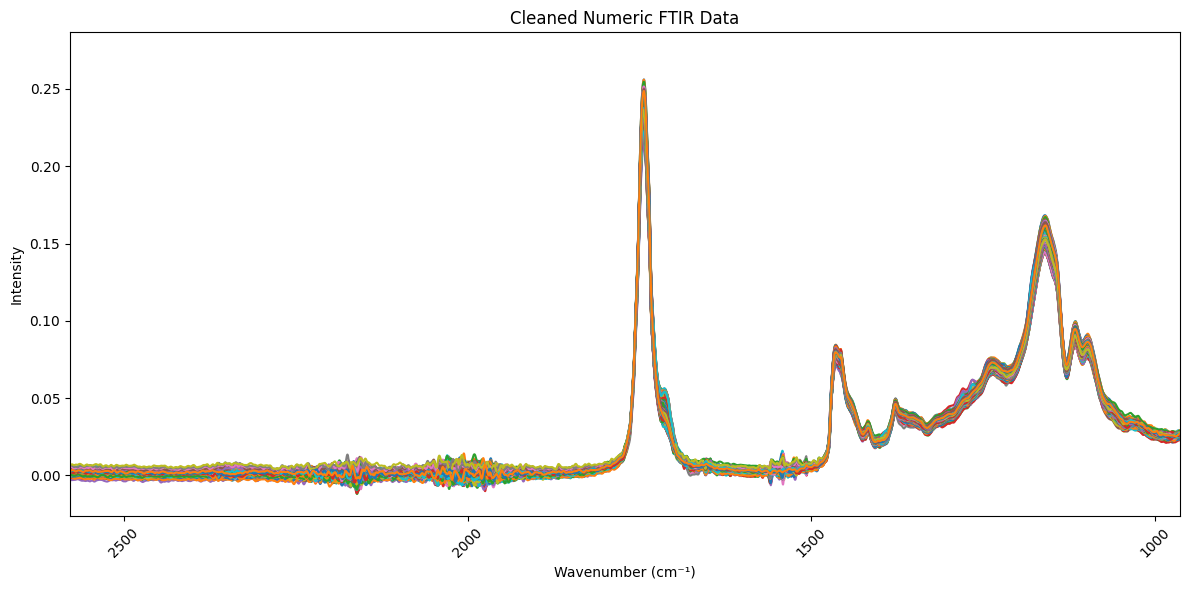

  prov_char country_char               wavenumber tgp_name dgp_name fgp_name  \
0       BBX           ID  ID-BBX-068-2307-031_001  Group 3  Group 2  Group 3   
1       BBX           ID  ID-BBX-068-2307-031_002  Group 3  Group 2  Group 3   
2       BBX           ID  ID-BBX-068-2307-031_003  Group 3  Group 2  Group 3   
3       BBX           ID  ID-BBX-068-2307-031_004  Group 3  Group 2  Group 3   
4       BBX           ID  ID-BBX-068-2307-031_005  Group 3  Group 2  Group 3   

  country_name thnoth_name  
0    Indonesia    Non-Thai  
1    Indonesia    Non-Thai  
2    Indonesia    Non-Thai  
3    Indonesia    Non-Thai  
4    Indonesia    Non-Thai  


In [31]:
# Identify numeric and string columns
numeric_cols = ftir_data.select_dtypes(include=[np.number]).columns.tolist()
string_cols = ftir_data.select_dtypes(exclude=[np.number]).columns.tolist()

# Define criteria for bad spectra
def is_bad_spectrum(row):
    # Example criteria: any NaN values or all zero values
    if row.isnull().any() or (row == 0).all():
        return True
    return False

# Identify rows with bad spectra
bad_spectra_indices = ftir_data[numeric_cols].apply(is_bad_spectrum, axis=1)

# Calculate mean and standard deviation of spectra
mean_spectra = ftir_data[numeric_cols].mean()
std_spectra = ftir_data[numeric_cols].std()

# Define threshold for identifying outliers
threshold = 3  # This can be adjusted

# Identify outliers
outliers = ftir_data[numeric_cols].apply(lambda x: np.abs(x - mean_spectra) > threshold * std_spectra, axis=1).sum(axis=1) > 0

# Combine bad spectra and outliers
to_remove = bad_spectra_indices | outliers

# Remove bad spectra and outliers
cleaned_ftir_data = ftir_data[~to_remove]

# Retain string columns
cleaned_string_ftir_data = cleaned_ftir_data[string_cols]

# Plot the cleaned numeric data
plt.figure(figsize=(12, 6))
plt.plot(cleaned_ftir_data[numeric_cols].T)
plt.title('Cleaned Numeric FTIR Data')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Intensity')

# Improve x-axis readability by setting ticks at rounded intervals and rotating labels
ax = plt.gca()
ax.invert_xaxis()  # Reverse the x-axis

# Set specific tick positions and labels based on actual data range
actual_wavenumbers = [float(col) for col in numeric_cols]
rounded_ticks = [4000, 3500, 3000, 2500, 2000, 1500, 1000, 650]

# Find the closest actual wavenumber for each rounded tick
tick_positions = [actual_wavenumbers.index(min(actual_wavenumbers, key=lambda x: abs(x - tick))) for tick in rounded_ticks]
tick_labels = [f'{rounded_ticks[i]}' for i in range(len(tick_positions))]

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, fontsize=10)
ax.set_xlim([4000, 650])  # Set x-axis limits to match desired range
plt.grid(False)  # Disable grid if preferred

# Adjust layout to prevent label cut-off
plt.tight_layout()

# Show the plot
plt.show()

# Display cleaned string FTIR data (first few rows)
print(cleaned_string_ftir_data.head())


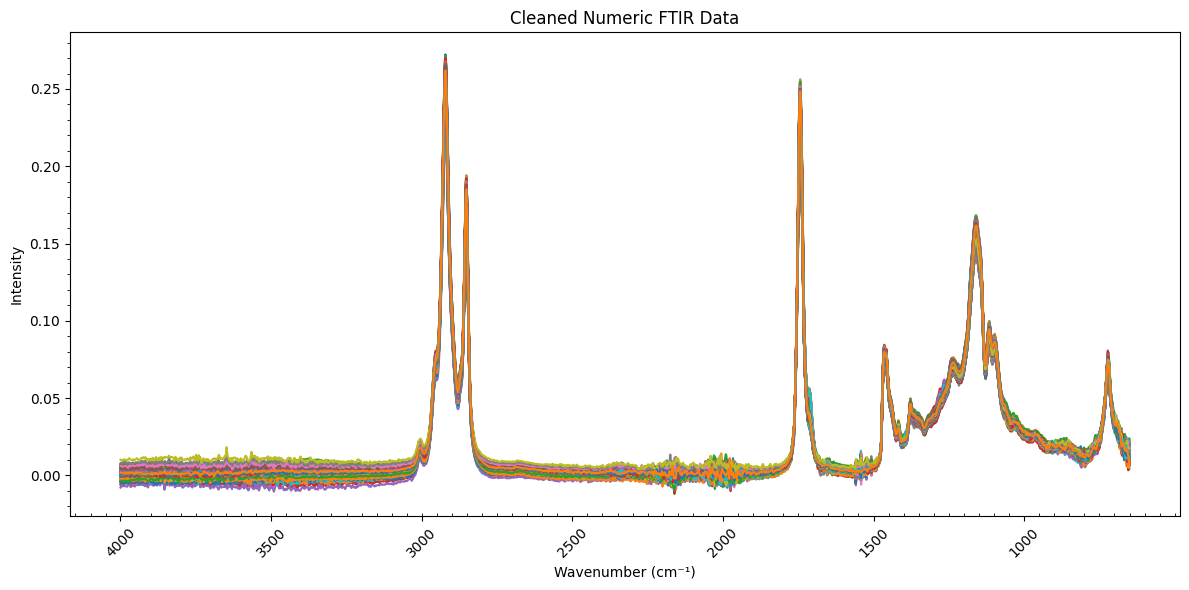

  prov_char country_char               wavenumber tgp_name dgp_name fgp_name  \
0       BBX           ID  ID-BBX-068-2307-031_001  Group 3  Group 2  Group 3   
1       BBX           ID  ID-BBX-068-2307-031_002  Group 3  Group 2  Group 3   
2       BBX           ID  ID-BBX-068-2307-031_003  Group 3  Group 2  Group 3   
3       BBX           ID  ID-BBX-068-2307-031_004  Group 3  Group 2  Group 3   
4       BBX           ID  ID-BBX-068-2307-031_005  Group 3  Group 2  Group 3   

  country_name thnoth_name  
0    Indonesia    Non-Thai  
1    Indonesia    Non-Thai  
2    Indonesia    Non-Thai  
3    Indonesia    Non-Thai  
4    Indonesia    Non-Thai  


In [51]:


# Identify numeric and string columns
numeric_cols = ftir_data.select_dtypes(include=[np.number]).columns.tolist()
string_cols = ftir_data.select_dtypes(exclude=[np.number]).columns.tolist()

# Define criteria for bad spectra
def is_bad_spectrum(row):
    # Example criteria: any NaN values or all zero values
    if row.isnull().any() or (row == 0).all():
        return True
    return False

# Identify rows with bad spectra
bad_spectra_indices = ftir_data[numeric_cols].apply(is_bad_spectrum, axis=1)

# Calculate mean and standard deviation of spectra
mean_spectra = ftir_data[numeric_cols].mean()
std_spectra = ftir_data[numeric_cols].std()

# Define threshold for identifying outliers
threshold = 3  # This can be adjusted

# Identify outliers
outliers = ftir_data[numeric_cols].apply(lambda x: np.abs(x - mean_spectra) > threshold * std_spectra, axis=1).sum(axis=1) > 0

# Combine bad spectra and outliers
to_remove = bad_spectra_indices | outliers

# Remove bad spectra and outliers
cleaned_ftir_data = ftir_data[~to_remove]

# Retain string columns
cleaned_string_ftir_data = cleaned_ftir_data[string_cols]

# Plot the cleaned numeric data
plt.figure(figsize=(12, 6))
plt.plot(cleaned_ftir_data[numeric_cols].T)
plt.title('Cleaned Numeric FTIR Data')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Intensity')

# Improve x-axis readability by setting ticks at rounded intervals and rotating labels
ax = plt.gca()
ax.invert_xaxis()  # Reverse the x-axis

# Set specific tick positions and labels based on actual data range
actual_wavenumbers = [float(col) for col in numeric_cols]
rounded_ticks = [4000, 3500, 3000, 2500, 2000, 1500, 1000]

# Find the closest actual wavenumber for each rounded tick
tick_positions = [actual_wavenumbers.index(min(actual_wavenumbers, key=lambda x: abs(x - tick))) for tick in rounded_ticks]
tick_labels = [f'{actual_wavenumbers[pos]:.0f}' for pos in tick_positions]

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, fontsize=10)
plt.grid(False)  # Disable grid if preferred

# Adjust layout to prevent label cut-off
plt.tight_layout()

# Adding minor ticks
ax.minorticks_on()
ax.xaxis.set_minor_locator(AutoMinorLocator(10))  # 5 minor ticks per major tick
ax.tick_params(axis='x', which='minor', direction='in')  # Minor ticks inside

# Show the plot
plt.show()

# Display cleaned string ftir_data (first few rows)
print(cleaned_string_ftir_data.head())


In [53]:
# Create a color mapping for each country
countries = cleaned_ftir_data['country_name'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(countries)))
country_color_map = dict(zip(countries, colors))

country_color_map

{'Indonesia': array([0. , 0. , 0.5, 1. ]),
 'Malaysia': array([0.49019608, 1.        , 0.47754586, 1.        ]),
 'Thailand': array([0.5, 0. , 0. , 1. ])}

C:\Users\pingk\AppData\Local\Temp\ipykernel_18480\380373809.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_ftir_data['country_numeric'] = cleaned_ftir_data['country_name'].map(country_map)


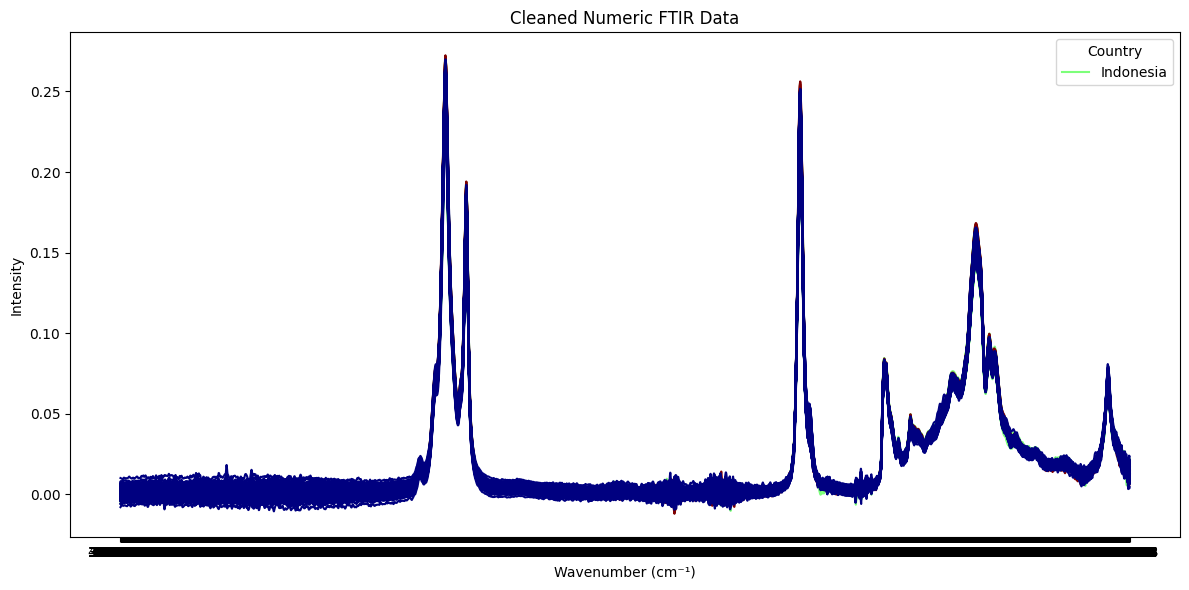

In [54]:
# Identify numeric columns
numeric_cols = ftir_data.columns[3:-5]
string_cols = ftir_data.columns[:3].tolist() + ftir_data.columns[-5:].tolist()

# Define criteria for bad spectra
def is_bad_spectrum(row):
    if row.isnull().any() or (row == 0).all():
        return True
    return False

# Identify rows with bad spectra
bad_spectra_indices = ftir_data[numeric_cols].apply(is_bad_spectrum, axis=1)

# Calculate mean and standard deviation of spectra
mean_spectra = ftir_data[numeric_cols].mean()
std_spectra = ftir_data[numeric_cols].std()

# Define threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = ftir_data[numeric_cols].apply(lambda x: np.abs(x - mean_spectra) > threshold * std_spectra, axis=1).sum(axis=1) > 0

# Combine bad spectra and outliers
to_remove = bad_spectra_indices | outliers

# Remove bad spectra and outliers
cleaned_ftir_data = ftir_data[~to_remove]

# Create a numerical mapping for each country
country_map = {'Indonesia': 1, 'Thailand': 0, 'Malaysia': 2}
cleaned_ftir_data['country_numeric'] = cleaned_ftir_data['country_name'].map(country_map)

# Plot the cleaned numeric data
plt.figure(figsize=(12, 6))
for idx, row in cleaned_ftir_data.iterrows():
    country_numeric = row['country_numeric']
    plt.plot(row[numeric_cols], label=row['country_name'] if idx == 0 else "", color=plt.cm.jet(country_numeric / 2))

plt.title('Cleaned Numeric FTIR Data')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Intensity')
plt.gca().invert_xaxis()
plt.legend(title='Country', loc='upper right')
plt.tight_layout()
plt.show()


C:\Users\pingk\AppData\Local\Temp\ipykernel_18480\4202589034.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_ftir_data['country_numeric'] = cleaned_ftir_data['country_name'].map(country_map)


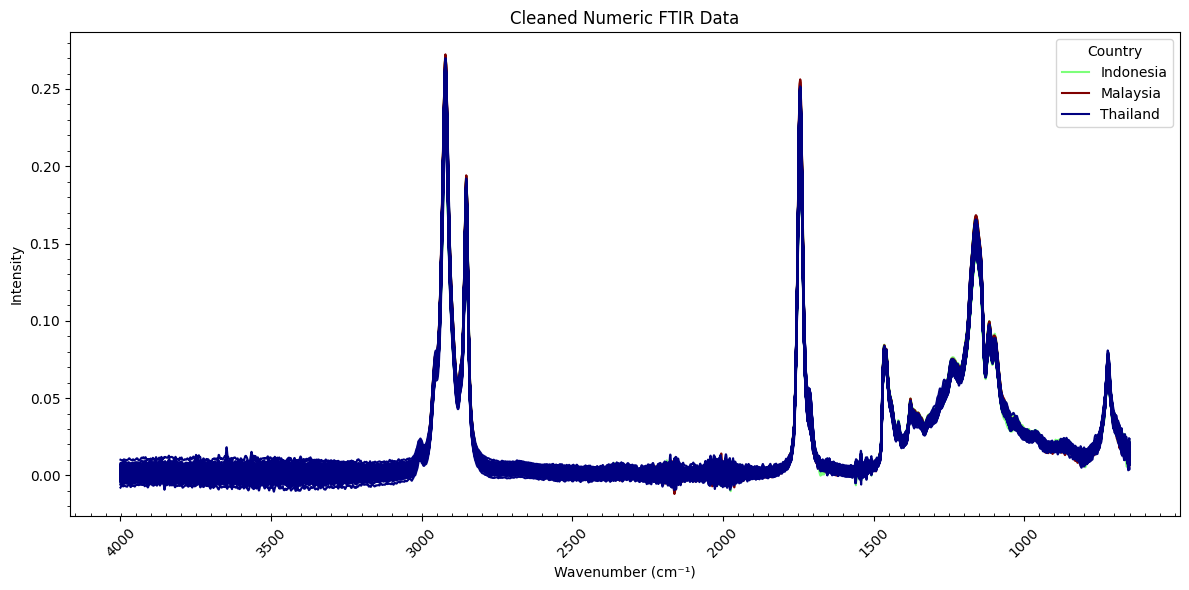

In [56]:
# Identify numeric columns
numeric_cols = ftir_data.columns[3:-5]
string_cols = ftir_data.columns[:3].tolist() + ftir_data.columns[-5:].tolist()

# Define criteria for bad spectra
def is_bad_spectrum(row):
    if row.isnull().any() or (row == 0).all():
        return True
    return False

# Identify rows with bad spectra
bad_spectra_indices = ftir_data[numeric_cols].apply(is_bad_spectrum, axis=1)

# Calculate mean and standard deviation of spectra
mean_spectra = ftir_data[numeric_cols].mean()
std_spectra = ftir_data[numeric_cols].std()

# Define threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = ftir_data[numeric_cols].apply(lambda x: np.abs(x - mean_spectra) > threshold * std_spectra, axis=1).sum(axis=1) > 0

# Combine bad spectra and outliers
to_remove = bad_spectra_indices | outliers

# Remove bad spectra and outliers
cleaned_ftir_data = ftir_data[~to_remove]

# Create a numerical mapping for each country
country_map = {'Indonesia': 1, 'Thailand': 0, 'Malaysia': 2}
cleaned_ftir_data['country_numeric'] = cleaned_ftir_data['country_name'].map(country_map)

# Plot the cleaned numeric data
plt.figure(figsize=(12, 6))
added_labels = set()
for idx, row in cleaned_ftir_data.iterrows():
    country = row['country_name']
    country_numeric = row['country_numeric']
    color = plt.cm.jet(country_numeric / 2)
    if country not in added_labels:
        plt.plot(row[numeric_cols], label=country, color=color)
        added_labels.add(country)
    else:
        plt.plot(row[numeric_cols], color=color)

plt.title('Cleaned Numeric FTIR Data')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Intensity')

# Improve x-axis readability by setting ticks at rounded intervals and rotating labels
ax = plt.gca()
ax.invert_xaxis()  # Reverse the x-axis

# Set specific tick positions and labels based on actual data range
actual_wavenumbers = [float(col) for col in numeric_cols]
rounded_ticks = [4000, 3500, 3000, 2500, 2000, 1500, 1000]

# Find the closest actual wavenumber for each rounded tick
tick_positions = [actual_wavenumbers.index(min(actual_wavenumbers, key=lambda x: abs(x - tick))) for tick in rounded_ticks]
tick_labels = [f'{actual_wavenumbers[pos]:.0f}' for pos in tick_positions]

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, fontsize=10)
plt.grid(False)  # Disable grid if preferred

# Adjust layout to prevent label cut-off
plt.tight_layout()

# Adding minor ticks
ax.minorticks_on()
ax.xaxis.set_minor_locator(AutoMinorLocator(10))  # 5 minor ticks per major tick
ax.tick_params(axis='x', which='minor', direction='in')  # Minor ticks inside

plt.legend(title='Country', loc='upper right')
plt.tight_layout()


plt.show()
